# Music Genre Classification using Librosa.

## Loading the GTZAN Dataset.

In [1]:
import os
import librosa
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Path of the Folder containg the Genres
dataset_path = "gtzan/Data/genres_original"
# List to hold all the genres
genres = os.listdir(dataset_path)


## MFCC Feature Extraction.

### Function to extract MFCC features from each song and update the dataframe to the values.

In [3]:
def update_mfcc(df, genre, song_name):
    '''Function to extract MFCC features from a song and update the dataframe.
    '''
    # loading the audio file
    song_path = '/'.join([dataset_path, genre, song_name])
    audio_array, sampling_rate = librosa.load(song_path)

    # Extracting MFCC features  
    mfcc = librosa.feature.mfcc(y=audio_array, sr=sampling_rate, n_mfcc=20)
    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_std = np.std(mfcc, axis=1)
    # Creating a dictionary to hold the features
    features = {
        'filename': song_name,
        'genre': genre,
    }
    # Adding the mean and std of MFCC features to the feature dictionary
    for i in range(len(mfcc_mean)):
        features[f'mfcc_mean_{i+1}'] = mfcc_mean[i]
        features[f'mfcc_std_{i+1}'] = mfcc_std[i]

    # Converting the features dictionary to a pandas Series
    features_series = pd.Series(features)
    
    # Adding the features to the dataframe
    df.loc[len(df)] = features_series

    
    return df

### Extracting and saving the MFCC features into teh 'gtzan_mfcc_features.csv' file.

In [4]:
# Create a DataFrame to hold the features and labels of the audio files
df = pd.DataFrame(columns=['filename', 'genre', 'mfcc_mean_1', 'mfcc_std_1', 'mfcc_mean_2',
       'mfcc_std_2', 'mfcc_mean_3', 'mfcc_std_3', 'mfcc_mean_4', 'mfcc_std_4',
       'mfcc_mean_5', 'mfcc_std_5', 'mfcc_mean_6', 'mfcc_std_6', 'mfcc_mean_7',
       'mfcc_std_7', 'mfcc_mean_8', 'mfcc_std_8', 'mfcc_mean_9', 'mfcc_std_9',
       'mfcc_mean_10', 'mfcc_std_10', 'mfcc_mean_11', 'mfcc_std_11',
       'mfcc_mean_12', 'mfcc_std_12', 'mfcc_mean_13', 'mfcc_std_13',
       'mfcc_mean_14', 'mfcc_std_14', 'mfcc_mean_15', 'mfcc_std_15',
       'mfcc_mean_16', 'mfcc_std_16', 'mfcc_mean_17', 'mfcc_std_17',
       'mfcc_mean_18', 'mfcc_std_18', 'mfcc_mean_19', 'mfcc_std_19',
       'mfcc_mean_20', 'mfcc_std_20'])

# Loop through each genre and each song in the genre
for genre in genres:
    for audio_file in os.listdir(os.path.join(dataset_path, genre)):
       #Check if the file is a .wav file
       if audio_file.endswith('.wav'):
            # Update the dataframe with the MFCC features of the audio file
            df = update_mfcc(df, genre, audio_file)

# Saving the dataframe to a CSV file
df.to_csv('gtzan_mfcc_features.csv', index=False)


## Data Preprocessing.

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import joblib

# Split the data into features and labels
X = df.drop(columns=['filename', 'genre'])
y = df['genre']

# Encoding the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Saving for later use.
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(scaler, 'standard_scalar.pkl')

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=13)


## Model Training

In [6]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Building the CNN model
model = Sequential()
# Convolutional layers for feature extraction
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())

#Dense layers for classification
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer for genre classification
model.add(Dense(X_train.shape[1], activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

c:\Users\hajih\Harsh Mulodhia\Projects\Elevate_Labs\Music Genre Classification\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 38, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 17, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 6, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 3, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,440 (1.37 MB)

 Trainable params: 358,440 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Fitting the model.
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train,
                    validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test),
                    epochs=50, batch_size=32)

# Saving the model
model.save('music_genre_classification_model.keras')


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0664 - loss: 3.3868 - val_accuracy: 0.1200 - val_loss: 2.4671
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1443 - loss: 2.5886 - val_accuracy: 0.2750 - val_loss: 2.1554
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2316 - loss: 2.2404 - val_accuracy: 0.3550 - val_loss: 1.9195
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2450 - loss: 2.0909 - val_accuracy: 0.3300 - val_loss: 1.8081
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3449 - loss: 1.8696 - val_accuracy: 0.3450 - val_loss: 1.7705
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3569 - loss: 1.7900 - val_accuracy: 0.4000 - val_loss: 1.6239
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3672 - loss: 1.7427 - val_accuracy: 0.3950 - val_loss: 1.6047
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4059 - loss: 1.6002 - val_accuracy: 0.4300 - v

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


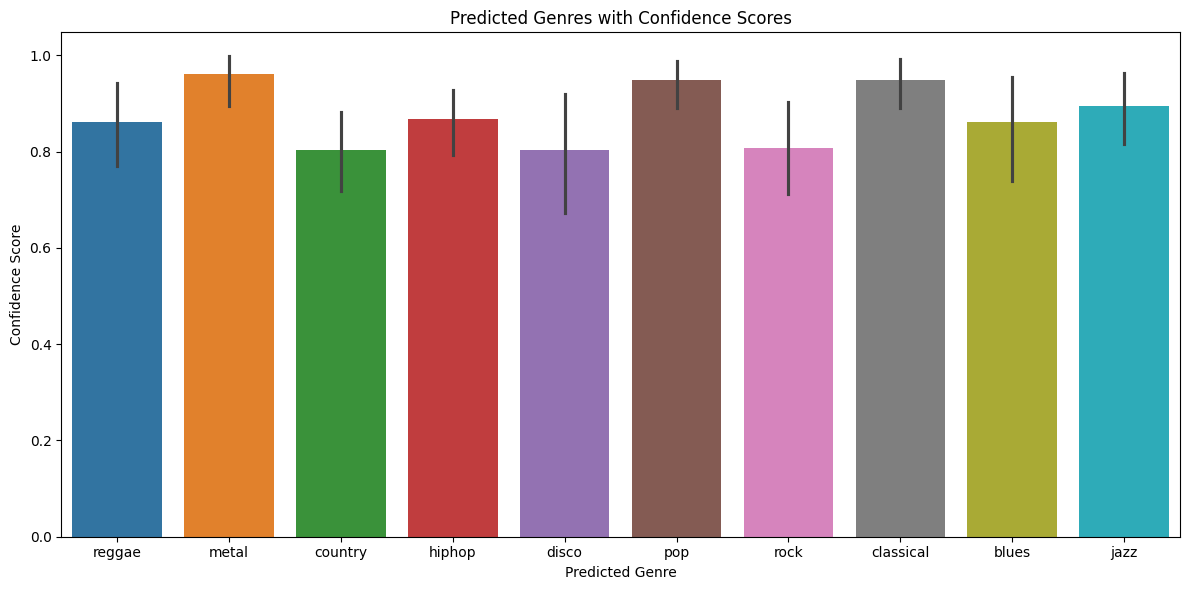

In [ ]:
# Prediction and evaluation
from sklearn.metrics import classification_report, confusion_matrix
# Making predictions on the test set
y_pred = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_classes = np.argmax(y_pred, axis=1)

predicted_genres = label_encoder.inverse_transform(y_pred_classes)
confidence_scores = np.max(y_pred, axis=1)

# Plotting the predicted genres with confidence scores
plt.figure(figsize=(12, 6))
sns.barplot(x=predicted_genres, y=confidence_scores, hue=predicted_genres)
plt.title('Predicted Genres with Confidence Scores')
plt.xlabel('Predicted Genre')
plt.ylabel('Confidence Score')
plt.tight_layout()
plt.show()

In [9]:
# Generating the classification report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print(report)

              precision    recall  f1-score   support

       blues       0.79      0.52      0.63        21
   classical       0.65      1.00      0.79        13
     country       0.62      0.67      0.64        24
       disco       0.55      0.38      0.44        16
      hiphop       0.39      0.61      0.48        18
        jazz       0.72      0.75      0.73        24
       metal       0.86      0.72      0.78        25
         pop       0.80      0.76      0.78        21
      reggae       0.50      0.61      0.55        18
        rock       0.38      0.25      0.30        20

    accuracy                           0.62       200
   macro avg       0.63      0.63      0.61       200
weighted avg       0.64      0.62      0.62       200



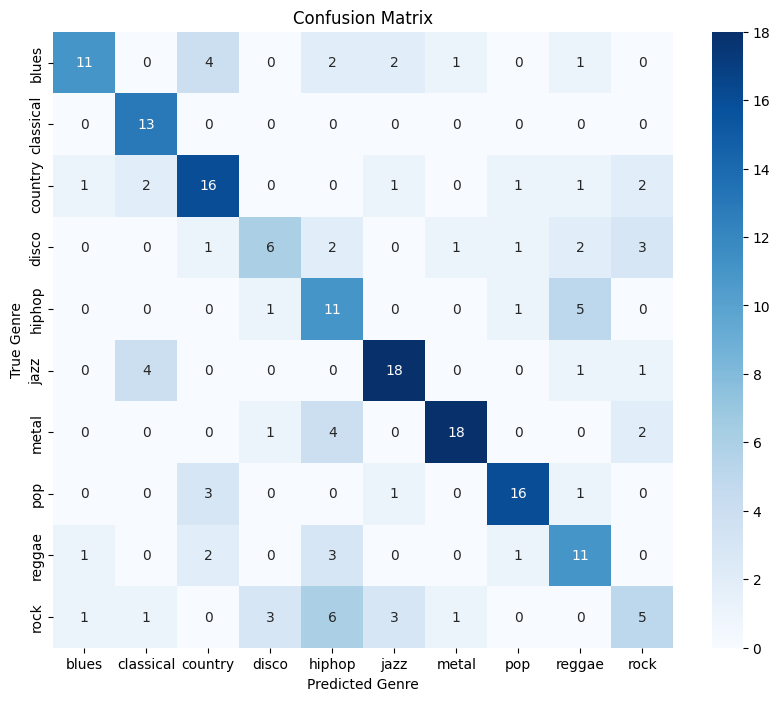

In [10]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Genre')
plt.ylabel('True Genre')
plt.show()

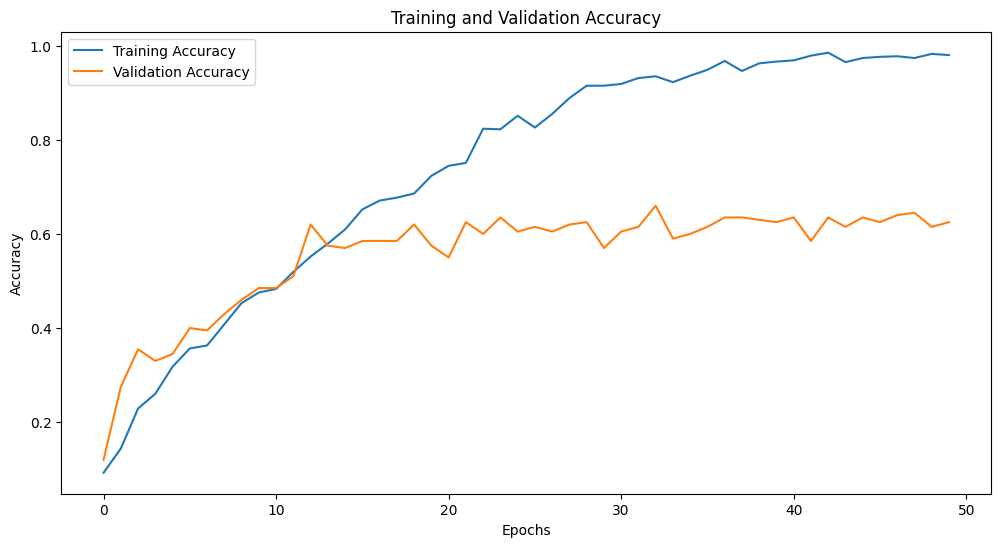

In [11]:
# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

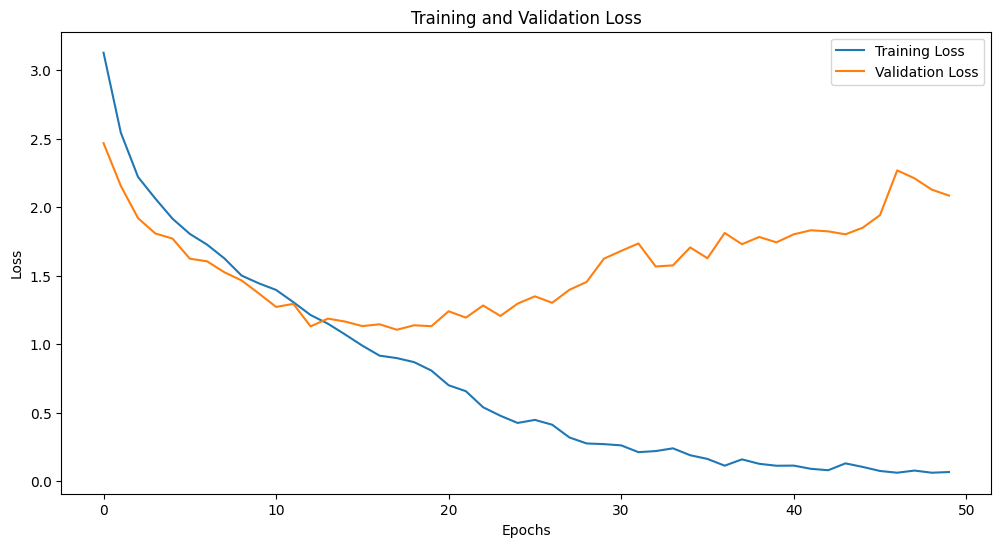

In [12]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()